In [1]:
import ma_codes as codes
from ma_codes import mysize, mymap, gray_red

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import re

## Some Plotting Parameters
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42
sb.set_style("ticks")

#pd.set_option("display.max_columns", 100)
sc.logging.print_version_and_date()

Running Scanpy 1.10.2, on 2024-09-17 09:27.


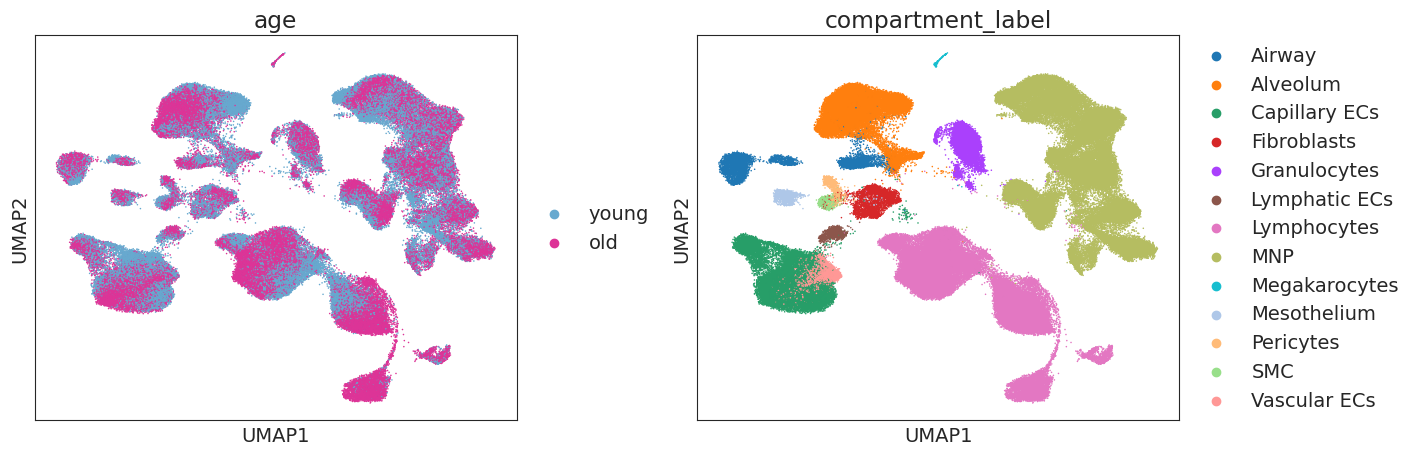

In [2]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "240904_Bleo_Ageing_annotated_final.h5ad", cache = False)
sc.pl.umap(adata, color = ["age", "compartment_label"], size = 5, wspace = 0.25)

### old Mice Results

In [3]:
from os import listdir
tab_folder = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_targeted_old/"

#files = np.setdiff1d(listdir(tab_folder), ["diffxpy_Donor_vs_COPD_AT1_constrained.txt"])
files = [f for f in listdir(tab_folder) if (".txt" in f)]
files[:20]

['diffxpy_control_vs_bleo_Krt8-ADI_d3_old.txt',
 'diffxpy_control_vs_bleo_Krt8-ADI_d30_old.txt',
 'diffxpy_control_vs_bleo_AT2_activated_d37_old.txt',
 'diffxpy_control_vs_bleo_AT2_d37_old.txt',
 'diffxpy_control_vs_bleo_AT1_d30_old.txt',
 'diffxpy_control_vs_bleo_AT1_d3_old.txt',
 'diffxpy_control_vs_bleo_AT1_d10_old.txt',
 'diffxpy_control_vs_bleo_Krt8-ADI_d37_old.txt',
 'diffxpy_control_vs_bleo_AT2_activated_d3_old.txt',
 'diffxpy_control_vs_bleo_Gzmk+_T_d10_old.txt',
 'diffxpy_control_vs_bleo_AT1_d20_old.txt',
 'diffxpy_control_vs_bleo_Myofibroblasts_d30_old.txt',
 'diffxpy_control_vs_bleo_Myofibroblasts_d37_old.txt',
 'diffxpy_control_vs_bleo_Myofibroblasts_d3_old.txt',
 'diffxpy_control_vs_bleo_AT2_d30_old.txt',
 'diffxpy_control_vs_bleo_Krt8-ADI_d20_old.txt',
 'diffxpy_control_vs_bleo_Gzmk+_T_d20_old.txt',
 'diffxpy_control_vs_bleo_Krt8-ADI_d10_old.txt',
 'diffxpy_control_vs_bleo_Gzmk+_T_d37_old.txt',
 'diffxpy_all_control_vs_bleo_timepoints_targeted_old.txt']

#### Order the files (to have nicer columns later on)

In [4]:
bleo_order = ["Myofibroblasts", 'AT1', 'AT2 activated', 'Krt8-ADI', "AT2"]
age = "old"

order = []
for ct in bleo_order:
    for d in ["d3", "d10", "d20", "d30", "d37"]:
        current = "diffxpy_control_vs_bleo_%s_%s_%s.txt" %(ct.replace(" ", "_"), d, age) 
        if current in files:
            order.append(current)

## :)
print(len(files))
print(len(order))

32
25


In [5]:
", ".join(order[:20])

'diffxpy_control_vs_bleo_Myofibroblasts_d3_old.txt, diffxpy_control_vs_bleo_Myofibroblasts_d10_old.txt, diffxpy_control_vs_bleo_Myofibroblasts_d20_old.txt, diffxpy_control_vs_bleo_Myofibroblasts_d30_old.txt, diffxpy_control_vs_bleo_Myofibroblasts_d37_old.txt, diffxpy_control_vs_bleo_AT1_d3_old.txt, diffxpy_control_vs_bleo_AT1_d10_old.txt, diffxpy_control_vs_bleo_AT1_d20_old.txt, diffxpy_control_vs_bleo_AT1_d30_old.txt, diffxpy_control_vs_bleo_AT1_d37_old.txt, diffxpy_control_vs_bleo_AT2_activated_d3_old.txt, diffxpy_control_vs_bleo_AT2_activated_d10_old.txt, diffxpy_control_vs_bleo_AT2_activated_d20_old.txt, diffxpy_control_vs_bleo_AT2_activated_d30_old.txt, diffxpy_control_vs_bleo_AT2_activated_d37_old.txt, diffxpy_control_vs_bleo_Krt8-ADI_d3_old.txt, diffxpy_control_vs_bleo_Krt8-ADI_d10_old.txt, diffxpy_control_vs_bleo_Krt8-ADI_d20_old.txt, diffxpy_control_vs_bleo_Krt8-ADI_d30_old.txt, diffxpy_control_vs_bleo_Krt8-ADI_d37_old.txt'

#### Snippet to add average expression per day and treatment
As in /Bleo_Mesenchyme/concatenate_spline_tables.ipynb

AT1 - d30


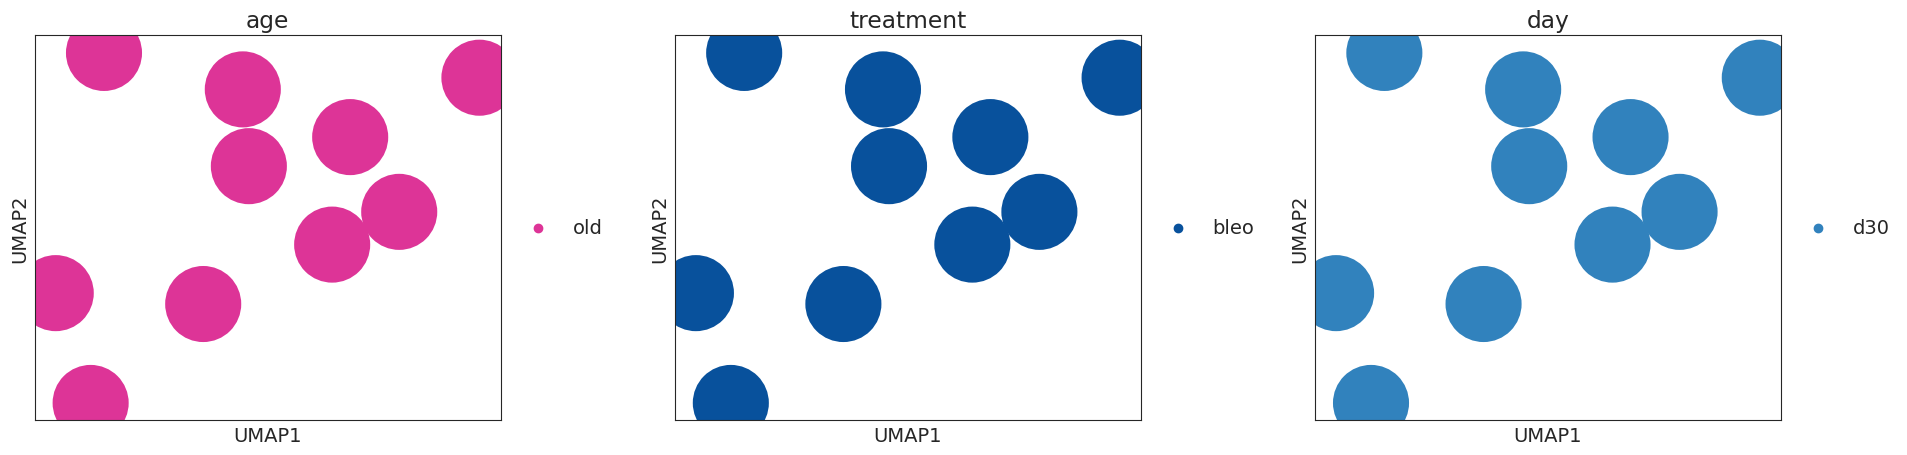

In [6]:
file = "diffxpy_control_vs_bleo_AT1_d30_old.txt"
row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
ct = re.sub("_d[\d]+", "", row).replace("_", " ")  ## adjusted
treat = "bleo"
age = "old"
time = re.findall("_d[\d]+_", file)[0].replace("_", "")
print("%s - %s" %(ct, time))

cells = (adata.obs.cell_type == ct) & (adata.obs.treatment == treat) &\
        (adata.obs.age == age) & (adata.obs.day == time)
sc.pl.umap(adata[cells], color = ["age", "treatment", "day"], wspace = 0.25)

In [7]:
## Mean expression of these very cells
xlabel = "day"
tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)

genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
means.shape

(4132, 1)

In [8]:
means.head(2)

day,d30
gene,
0610030E20Rik,0.0
Myo5b,0.0


#### Adapted mean expression for special cell types (Myofibroblasts, activated AT2, Krt8 ADI)

In [9]:
file = "diffxpy_control_vs_bleo_Myofibroblasts_d3_old.txt"
sum([f in file for f in ["Myofibroblasts", "Krt8-ADI"]]) 

1

In [10]:
file = "diffxpy_control_vs_bleo_AT1_d3_old.txt"
sum([f in file for f in ["Myofibroblasts", "Krt8-ADI"]]) 

0

Krt8-ADI - d3


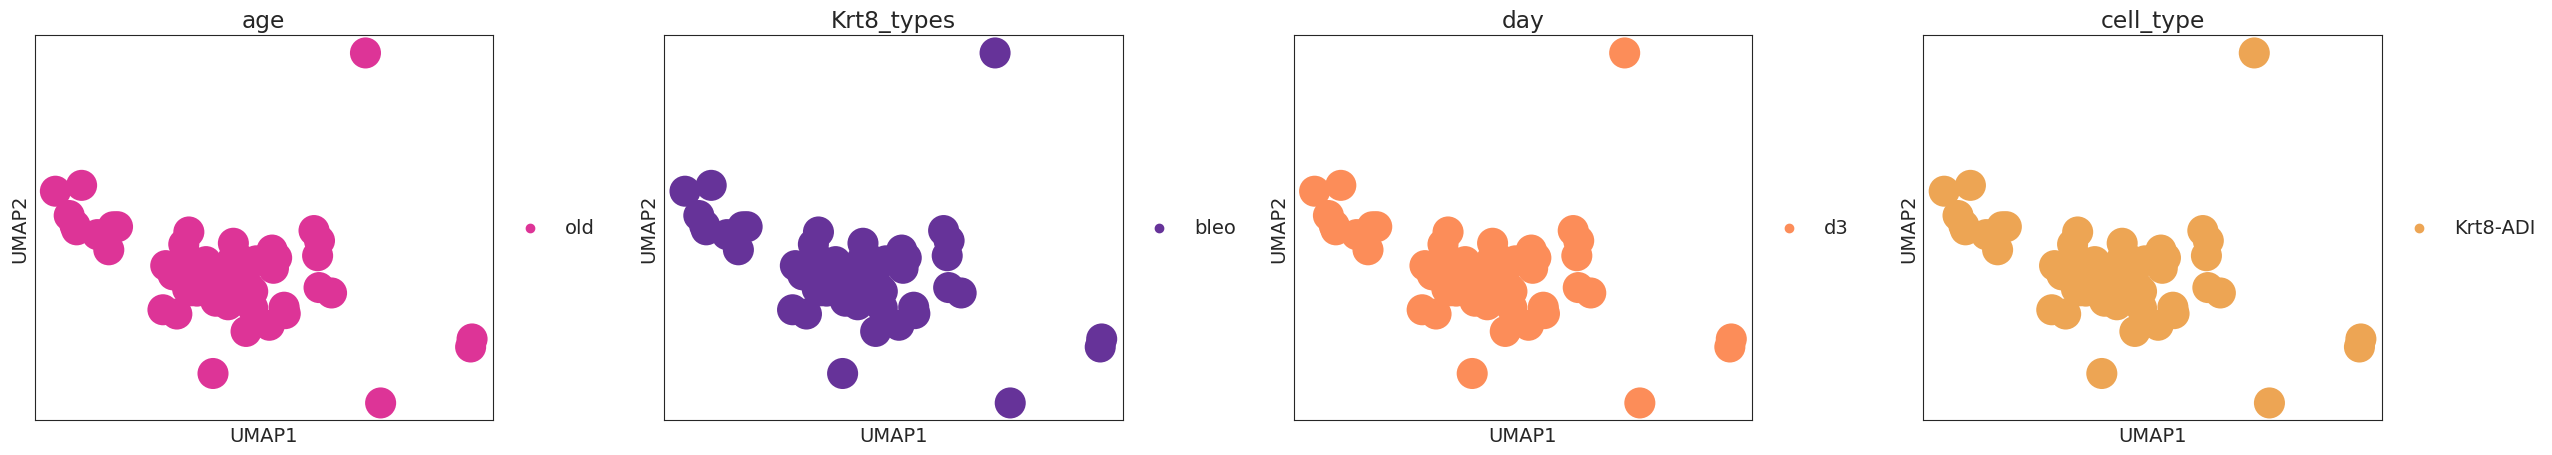

In [11]:
file = "diffxpy_control_vs_bleo_Krt8-ADI_d3_old.txt"
row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
ct = re.sub("_d[\d]+", "", row).replace("_", " ")  ## adjusted
treat = "bleo"
age = "old"
time = re.findall("_d[\d]+_", file)[0].replace("_", "")
print("%s - %s" %(ct, time))

ct_map = {"Myofibroblasts": "Myofib_types", "Krt8-ADI": "Krt8_types", "AT2 activated": "AT2activ_types"}

## In case is is a specially calculated cell type
if(sum([f in file for f in ["Myofibroblasts", "Krt8-ADI", "AT2 activated"]]) > 0):
    condition = ct_map[ct]
    cells = (adata.obs.loc[:, condition] == treat) & (adata.obs.treatment == treat) &\
            (adata.obs.age == age) & (adata.obs.day == time)
else:
    cells = (adata.obs.myofib_sender == ct) & (adata.obs.treatment == treat) &\
            (adata.obs.age == age) & (adata.obs.day == time)

sc.pl.umap(adata[cells], color = ["age", condition, "day", "cell_type"], wspace = 0.25)

In [12]:
## Mean expression of these very cells
xlabel = "day"
tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)

genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
means.shape

(4768, 1)

In [13]:
means.head(2)

day,d3
gene,
Anxa5,0.649755
Nrn1,0.000000


Krt8-ADI - d3


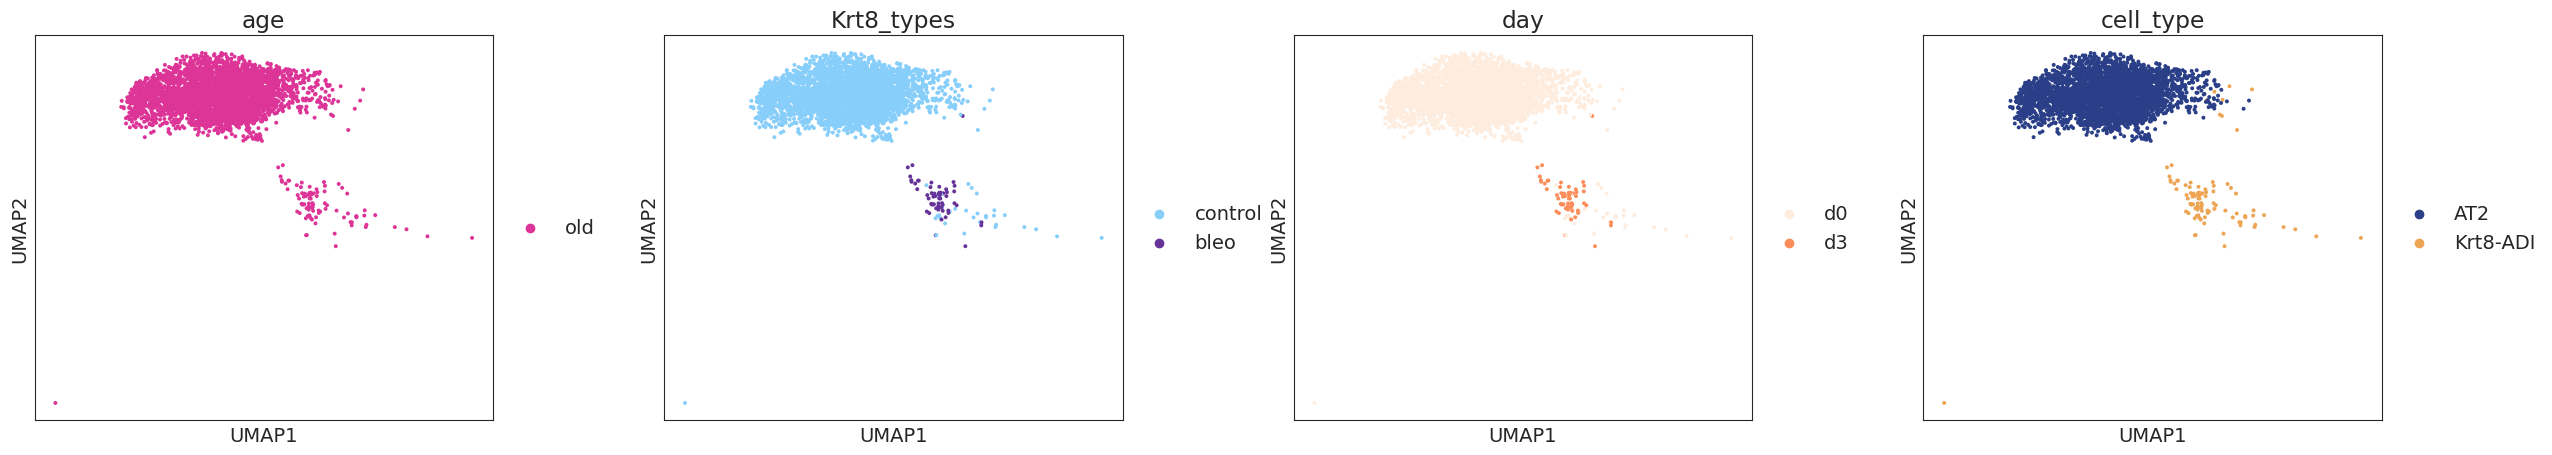

In [14]:
ct_map = {"Myofibroblasts": "Myofib_types", "Krt8-ADI": "Krt8_types", "AT2 activated": "AT2activ_types"}
file = "diffxpy_control_vs_bleo_Krt8-ADI_d3_old.txt"

row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
ct = re.sub("_d[\d]+", "", row).replace("_", " ")  ## adjusted
treat = "bleo"
age = "old"
time = re.findall("_d[\d]+_", file)[0].replace("_", "")
print("%s - %s" %(ct, time))

## In case is is a specially calculated cell type
if(sum([f in file for f in ["Myofibroblasts", "Krt8-ADI", "AT2_activated"]]) > 0):
    condition = ct_map[ct]
    ## Add corresponding controls
    if(time == "d3"):
        cells = (adata.obs.day.isin(["d0", time])) & (adata.obs.age == age) & \
                (adata.obs.loc[:, condition].isin(["control", "bleo"]))
    else:
        cells = (adata.obs.loc[:, condition] == treat) & (adata.obs.treatment == treat) &\
                (adata.obs.age == age) & (adata.obs.time_point == time)

else:
    if(time == "d3"):
        cells = (adata.obs.cell_type == ct) & (adata.obs.age == age) & (adata.obs.day.isin(["d0", time]))
    else:
        cells = (adata.obs.cell_type == ct) & (adata.obs.treatment == treat) &\
                (adata.obs.age == age) & (adata.obs.day == time)

sc.pl.umap(adata[cells], color = ["age", condition, "day", "cell_type"], wspace = 0.25)

In [15]:
## Mean expression of these very cells
xlabel = "day"
tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)

genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
means.shape

(4768, 2)

In [16]:
means.head(2)

day,d0,d3
gene,,
Anxa5,0.051676,0.649755
Nrn1,0.328142,0.000000


AT1 - d3


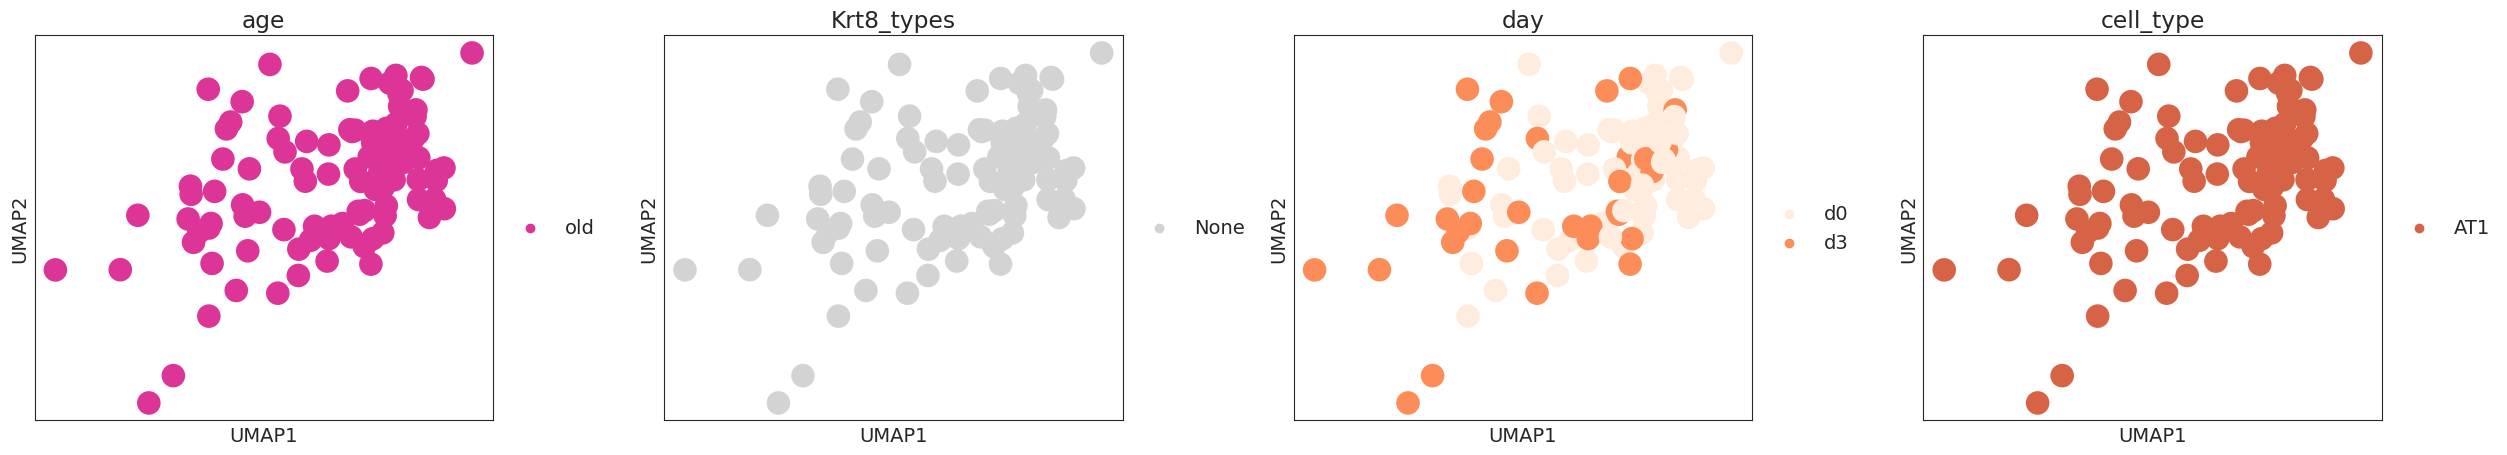

In [17]:
## Double check with normal cell type
file = "diffxpy_control_vs_bleo_AT1_d3_old.txt"

row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
ct = re.sub("_d[\d]+", "", row).replace("_", " ")  ## adjusted
treat = "bleo"
age = "old"
time = re.findall("_d[\d]+_", file)[0].replace("_", "")
print("%s - %s" %(ct, time))

## In case is is a specially calculated cell type
if(sum([f in file for f in ["Myofibroblasts", "Krt8-ADI", "AT2_activated"]]) > 0):
    condition = ct_map[ct]
    ## Add corresponding controls
    if(time == "d3"):
        cells = (adata.obs.day.isin(["d0", time])) & (adata.obs.age == age) & \
                (adata.obs.loc[:, condition].isin(["control", "bleo"]))
    else:
        cells = (adata.obs.loc[:, condition] == treat) & (adata.obs.treatment == treat) &\
                (adata.obs.age == age) & (adata.obs.day == time)

else:
    if(time == "d3"):
        cells = (adata.obs.cell_type == ct) & (adata.obs.age == age) & (adata.obs.day.isin(["d0", time]))
    else:
        cells = (adata.obs.cell_type == ct) & (adata.obs.treatment == treat) &\
                (adata.obs.age == age) & (adata.obs.day == time)

sc.pl.umap(adata[cells], color = ["age", condition, "day", "cell_type"], wspace = 0.25)

### Tidy - Concatenate DGE Tables for all cell types

In [18]:
## Concatenate all Tables
ct_map = {"Myofibroblasts": "Myofib_types", "Krt8-ADI": "Krt8_types", "AT-2 activated": "AT2activ_types"}

#files = [f for f in listdir(tab_folder) if (".txt" in f)]
files = order    ## set above for nicer column ordering

treat = "bleo"
age = "old"
xlabel = "day"

all_tabs = pd.DataFrame()
cols = ["pval", "log2fc", "pct.control", "pct.%s" %treat, "cell_type"]

for file in files:
    tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)
    
    row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
    ct = re.sub("_d[\d]+", "", row).replace("_", " ")
    time = re.findall("_d[\d]+_", file)[0].replace("_", "")
    tab["cell_type"] = row
    tab = tab.loc[:, cols].copy()    

    ## In case is is a specially calculated cell type
    if(sum([f in file for f in ["Myofibroblasts", "Krt8-ADI", "AT2 activated"]]) > 0):
        condition = ct_map[ct]
        
        ## Add corresponding d0 control mean expression if timepoint is d3
        if(time == "d3"):
            cells = (adata.obs.day.isin(["d0", time])) & (adata.obs.age == age) & \
                    (adata.obs.loc[:, condition].isin(["control", "bleo"]))
        else:
            cells = (adata.obs.loc[:, condition] == treat) & (adata.obs.treatment == treat) &\
                    (adata.obs.age == age) & (adata.obs.day == time)
    else:
        if(time == "d3"):
            cells = (adata.obs.cell_type == ct) & (adata.obs.age == age) & \
                    (adata.obs.day.isin(["d0", time]))
        else:
            cells = (adata.obs.cell_type == ct) & (adata.obs.treatment == treat) &\
                    (adata.obs.age == age) & (adata.obs.day == time)
    
    genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
    genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
    means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
    
    ## cell type and time point will be added anyways
    means.columns = ["avgExpr_%s" %col if col == "d0" else "avgExpr" for col in means.columns]    
    
    tab = pd.concat([tab, means.loc[tab.index]], axis = 1)

    all_tabs = pd.concat([all_tabs, tab], axis = 0)
    print("Concatenated %s\t%s x %s" %(row, all_tabs.shape[0], all_tabs.shape[1]))
    
all_tabs.head(4)

Concatenated Myofibroblasts_d3	5699 x 7
Concatenated Myofibroblasts_d10	12776 x 7
Concatenated Myofibroblasts_d20	18998 x 7
Concatenated Myofibroblasts_d30	25973 x 7
Concatenated Myofibroblasts_d37	32413 x 7
Concatenated AT1_d3	37455 x 7
Concatenated AT1_d10	42177 x 7
Concatenated AT1_d20	47020 x 7
Concatenated AT1_d30	51152 x 7
Concatenated AT1_d37	56084 x 7
Concatenated AT2_activated_d3	60655 x 7
Concatenated AT2_activated_d10	65819 x 7
Concatenated AT2_activated_d20	70171 x 7
Concatenated AT2_activated_d30	74774 x 7
Concatenated AT2_activated_d37	79542 x 7
Concatenated Krt8-ADI_d3	84310 x 7
Concatenated Krt8-ADI_d10	90149 x 7
Concatenated Krt8-ADI_d20	95420 x 7
Concatenated Krt8-ADI_d30	101197 x 7
Concatenated Krt8-ADI_d37	106645 x 7
Concatenated AT2_d3	110348 x 7
Concatenated AT2_d10	114078 x 7
Concatenated AT2_d20	117268 x 7
Concatenated AT2_d30	120996 x 7
Concatenated AT2_d37	124399 x 7


,pval,log2fc,pct.control,pct.bleo,cell_type,avgExpr_d0,avgExpr
gene,,,,,,,
Dnajc7,0.0,-297.776029,0.077441,0.0,Myofibroblasts_d3,0.057248,0.0
Rnf181,0.0,-297.776029,0.094276,0.0,Myofibroblasts_d3,0.067686,0.0
Frg1,0.0,-297.776029,0.104377,0.0,Myofibroblasts_d3,0.076420,0.0
Taok2,0.0,-297.776029,0.060606,0.0,Myofibroblasts_d3,0.041945,0.0


In [19]:
from statsmodels.stats.multitest import multipletests

## Multiple Testing Corretion and Pivot into final Master Table
all_tabs["pval_adj"] = multipletests(all_tabs["pval"], method = "fdr_bh")[1]

all_tabs = all_tabs.pivot(columns = "cell_type")  ## uses index by default
cols = ["%s_%s" %(all_tabs.columns.get_level_values(0)[i], all_tabs.columns.get_level_values(1)[i])
        for i in range(len(all_tabs.columns.values))]
all_tabs.columns = cols

## Do not add a percentage per cell type column additional (after concatenating and pivoting all)
#all_tabs = codes.add_pct(adata[cells], all_tabs, gene_label = "index", group_by = "cell_type",
#                         ids = adata.obs.loc[:, "cell_type"].cat.categories)

## Add extra columns for easier Filtering
all_tabs["max_pct"] = (all_tabs.filter(like = "pct.")).max(axis = 1)

qval_thresh = 0.05
all_tabs["significant_in_nr"] = (all_tabs.filter(like = "pval_adj") < qval_thresh).sum(1)
tmp = all_tabs.filter(like = "pval_adj") < qval_thresh
all_tabs["significant_in"] = [", ".join(c.replace("pval_adj_", "") 
                                        for c in all_tabs.filter(like = "pval_adj").columns[tmp.loc[i]])
                                for i in tmp.index]
print(all_tabs.shape)
all_tabs.head(3)

(10045, 178)


,pval_AT1_d10,pval_AT1_d20,pval_AT1_d3,pval_AT1_d30,pval_AT1_d37,pval_AT2_activated_d10,pval_AT2_activated_d20,pval_AT2_activated_d3,pval_AT2_activated_d30,pval_AT2_activated_d37,...,pval_adj_Krt8-ADI_d30,pval_adj_Krt8-ADI_d37,pval_adj_Myofibroblasts_d10,pval_adj_Myofibroblasts_d20,pval_adj_Myofibroblasts_d3,pval_adj_Myofibroblasts_d30,pval_adj_Myofibroblasts_d37,max_pct,significant_in_nr,significant_in
gene,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,NaN,NaN,0.004914,NaN,NaN,NaN,NaN,NaN,0.315615,NaN,...,0.180714,NaN,NaN,0.388390,NaN,NaN,NaN,0.142857,2,"AT1_d3, Krt8-ADI_d10"
0610010F05Rik,NaN,NaN,0.862220,NaN,NaN,NaN,NaN,NaN,NaN,0.861931,...,NaN,0.21759,0.105830,NaN,0.772409,0.785433,0.371269,0.114286,0,
0610012G03Rik,NaN,0.761908,0.248951,NaN,NaN,0.26502,0.483199,NaN,NaN,NaN,...,NaN,NaN,0.533044,0.736596,NaN,0.880989,0.645769,0.122807,0,


In [20]:
#pd.set_option("display.max_columns", 100)
all_tabs.significant_in_nr.value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
significant_in_nr,0,1,4,2,3,5,6,7,8,9,...,11,12,13,14,15,16,17,19,18,20
count,2384,1443,1004,974,857,741,590,492,396,324,...,189,141,96,69,39,22,15,7,5,2


In [21]:
all_tabs.loc[["Krt8", "Lcn2", "Lgals3"]].filter(regex = "pval_adj_AT-2_activ|significant")

,significant_in_nr,significant_in
gene,,
Krt8,11,"AT1_d10, AT1_d20, AT2_activated_d10, AT2_activ..."
Lcn2,13,"AT2_activated_d10, AT2_activated_d20, AT2_acti..."
Lgals3,8,"AT1_d10, AT1_d20, AT1_d3, Krt8-ADI_d10, Krt8-A..."


In [22]:
all_tabs.loc[['Acta2', 'Aspn', 'Cthrc1', "Spp1"], ["significant_in_nr", "significant_in"]]

,significant_in_nr,significant_in
gene,,
Acta2,1,Myofibroblasts_d20
Aspn,2,"Myofibroblasts_d10, Myofibroblasts_d20"
Cthrc1,4,"Myofibroblasts_d10, Myofibroblasts_d20, Myofib..."
Spp1,4,"Myofibroblasts_d10, Myofibroblasts_d20, Myofib..."


In [23]:
## Remove the ones not significant in any comparison and save Table
all_tabs = all_tabs[all_tabs.significant_in_nr > 0].copy()
print(all_tabs.shape)

out_folder = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_targeted_old/"
all_tabs.to_csv(out_folder + "diffxpy_all_control_vs_bleo_timepoints_targeted_old.txt", sep = "\t")

(7661, 178)


### Export upregulated gene lists
Based on /short_scripts/Bleo_Aging/concatenate_dge_tables.ipynb

In [24]:
## Not considering "expressed in at least x mice" in mouse data sets.

def export_gene_table(tab, condition = "bleo", qval_thresh = 0.05, pct_thresh = 0.05, cts = None):
    
    genetab = pd.DataFrame(columns = ["genes_logfc_05", "genes_logfc_1", "genes_logfc_2"])
    
    for ct in cts:
        tab_ct = tab.filter(regex = ct.replace("+", "\+")).copy()

        tab_up = tab_ct[(tab_ct.loc[:, "pval_adj_%s" %ct] < qval_thresh) & 
                        #(tab_ct.loc[:, "%s_count_%s" %(condition, ct)] > ds_thresh) &
                        (tab_ct.loc[:, "pct.%s_%s" %(condition, ct)] > pct_thresh)].copy()
        
        tab_down = tab_ct[(tab_ct.loc[:, "pval_adj_%s" %ct] < qval_thresh) & 
                          #(tab_ct.loc[:, "PBS_count_%s" %ct] > mouse_thresh) &
                          (tab_ct.loc[:, "pct.control_%s" %ct] > pct_thresh)].copy()   
        cur_upgenes = []
        cur_downgenes = []

        for log_thresh in [0.5, 1, 2]:
            up_genes = tab_up[tab_up.loc[:, "log2fc_%s" %ct] > log_thresh].sort_values("pval_adj_%s" %ct).index.values
            down_genes = tab_down[tab_down.loc[:, "log2fc_%s" %ct] < -log_thresh].sort_values("pval_adj_%s" %ct).index.values

            cur_upgenes = cur_upgenes + [",".join(up_genes)]
            cur_downgenes = cur_downgenes + [",".join(down_genes)]

        genetab.loc["%s_up" %ct] = cur_upgenes
        genetab.loc["%s_down" %ct] = cur_downgenes

    return genetab

In [25]:
#cts = [f.split(".")[0].split("_vs_")[1].replace("ILD_", "") for f in files]
cts = [re.split("_vs_bleo_", re.split("\.", f)[0])[1].replace("_old", "") for f in files]
", ".join(cts[:20])

'Myofibroblasts_d3, Myofibroblasts_d10, Myofibroblasts_d20, Myofibroblasts_d30, Myofibroblasts_d37, AT1_d3, AT1_d10, AT1_d20, AT1_d30, AT1_d37, AT2_activated_d3, AT2_activated_d10, AT2_activated_d20, AT2_activated_d30, AT2_activated_d37, Krt8-ADI_d3, Krt8-ADI_d10, Krt8-ADI_d20, Krt8-ADI_d30, Krt8-ADI_d37'

In [26]:
genetab = export_gene_table(all_tabs, condition = "bleo", qval_thresh = 0.05, pct_thresh = 0.1, cts = cts)
genetab.shape

(50, 3)

In [27]:
genetab.head(4)

,genes_logfc_05,genes_logfc_1,genes_logfc_2
Myofibroblasts_d3_up,"Saa3,Bst2,Cyp7b1,Ankmy2,Fth1,Timp1,Efemp2,Cstb...","Saa3,Bst2,Cyp7b1,Ankmy2,Fth1,Timp1,Efemp2,Cstb...","Saa3,Bst2,Cyp7b1,Ankmy2,Timp1,Efemp2,Cstb,Mybl..."
Myofibroblasts_d3_down,"1810037I17Rik,Pi16,Pid1,Pik3ca,Podn,Polr2m,Ppl...","1810037I17Rik,Pgrmc1,Pi16,Pid1,Pik3ca,Podn,Pol...","1810037I17Rik,Pid1,Pik3ca,Podn,Polr2m,Ppl,Ppp2..."
Myofibroblasts_d10_up,"Kif26b,Crlf1,Cthrc1,Col3a1,Col1a2,Col1a1,Diaph...","Hbegf,Cthrc1,Kif26b,Crlf1,Col5a2,Fn1,Col3a1,Co...","Kif26b,Ltbp2,Tnc,Hbegf,Spp1,Fscn1,Timp1,Diaph3..."
Myofibroblasts_d10_down,"Fbln1,Sptbn1,Scn7a,Clec3b,Hsp90aa1,Dpep1,Akap1...","Pcolce2,Tns1,Crebrf,Ndrg2,Twsg1,Cygb,Mettl7a1,...","Pi16,Gm42418,Pcolce2,Ogn,Ntn4,Ndrg2,Clec3b,Cre..."


In [28]:
genetab.loc["Myofibroblasts_d3_up", "genes_logfc_05"]

'Saa3,Bst2,Cyp7b1,Ankmy2,Fth1,Timp1,Efemp2,Cstb,Serpina3n,Mybl1,Plac8,Iigp1,Emilin1,mt-Co1,Tubb4b,Lgmn,Thyn1,Parp9,Ifitm3,Ttc4,Col5a2,Rnf213,Cp,Mlec,H2-T23,Col4a2,Rps11,Erp44,Mgp,Rbm3,2810006K23Rik,Ndufs2,Slc5a3,Mt1,Steap4,Irf9,Prelid1,Stat1,Spast,Mipol1,Phf11d,Ssr2,Eif2ak2,Tmem53,Bysl,Sphk1,Stat2,Ewsr1,Ino80c,Gtf2a2,Dut,Itgb8,Erap1,Uba52,Lipg,Map4,Snd1,Litaf,Bmpr2,Lamtor5,Tmtc3,Casp3,Eif4a3,Frmd4a,Ppic,Axin2,Id1,Asb8,Mt2,Mmadhc,Msto1,Dbnl,Eef1akmt2,Mthfd2,Lig1,Cpeb1,Snx3,Sec61b,Tnpo1,B4galt5,Sod2,Vcan,Ifi27l2a,Ssr4,Isyna1,B2m,Tceal8,Vmp1,Ptgfrn,Sec22b,Atp6v0a2,Tomm34,Trmt2a,Lemd3,Zbtb21,Etnk1,Mpdu1,Ttl,Fn1,Rab5if,Maged1,Higd2a,Ncbp1,Ptpa,Asah1,Bak1,Rps27l,Eif2d,Lgals3bp,Jak1,Lbp,Sec61a1,Sdc4,Cryz,Brpf1,Hmgcs1,Cinp,R3hcc1l,Mon2,Col3a1,Trpc4ap,Myo10,Cstf2t,Zfp651,Fbxl5,Ttc27,Lrrc41,Pnp2,Apex1,Gstp1,Gm6977,Edrf1,Actr2,Rplp0,Ppa1,Akt1'

In [29]:
genetab.loc["AT2_activated_d10_up", "genes_logfc_1"]

'H2-D1,Hbegf,Lrg1,Gpx1,Ly6c1,Ly6e,Ftl1,Fth1,Mt1,Cxcl17,Orm1,Ctps,Pfn1,Lcn2,Cdkn1a,Clu,S100a11,Tmem37,Actb,Anxa3,Tmem176a,Rps27l,Tacstd2,Sparc,Slpi,Slc26a4,Ccng1,Krt7,Ephx1,Akap5,Anxa1,Cox6b2,Itm2a,Atp6v0e,2200002D01Rik,Cd14,Gapdh,Itm2b,Cdc42,Col6a2,Anxa5,Taldo1,Ctsz,Lamc2,Tnfrsf12a,Bax,Dmkn,Socs3,Tubb2a,Scnn1b,9530077C05Rik,Arpc2,Txnip,Slc9a3r1,B2m,Slc5a1,Zmat3,Capzb,Gch1'

In [30]:
## Save these lists
genetab.to_csv(out_folder + "control_vs_bleo_regulated_genes_timepoints_targeted_old.txt", sep = "\t")